In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats

In [ ]:
data_directory = '../Data/Lineage_Results/'

# Get a list of all CSV files in the directory
csv_files = glob.glob(data_directory + '*.csv')

# Create an empty list to store the dataframes
dfs = []

# Iterate over each CSV file and read it into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
combined_df = pd.concat(dfs)

df = combined_df.copy()

In [3]:
df.rename(columns={'first.frame': 'first_frame', 'ngfp.mean': 'ngfp_mean', 
                   'gfp.mean': 'gfp_mean', 'mcherry.mean': 'mcherry_mean', 
                   'x.mean': 'x_mean', 'y.mean': 'y_mean'}, inplace=True)

df_1 = df.reset_index(drop=True)

# # if needed, exclude the gene rpsL
# df_1= df_1[df_1.gene != 'rpsL']

print("Is index unique:", df_1.index.is_unique)

Is index unique: True


In [4]:
df_1 = df_1.loc[df_1['Autoinducer'] == 'Without']

In [5]:
df_1.groupby('gene').cluster.nunique()

gene
lasB     9
lasI    10
lasR    11
rpsL    12
Name: cluster, dtype: int64

In [8]:
delta = 'sister'
col = 'sid'

# 创建一个空列表来保存每个 cluster 的 delta_sister_gfp 描述信息
delta_gfp_summary = []

# 对每个 cluster 分组并计算 delta_sister_gfp
for cluster, subset in df_1.groupby('cluster'):
    
    # reset index
    # subset = subset.reset_index(drop=True)
    
    # 为当前 cluster 创建 cid 到 gfp_mean 的映射字典
    dict_gfp = subset.set_index('cid')['ngfp_mean'].to_dict()
    
    # 计算 delta_sister_gfp
    df_1.loc[subset.index, f'∆_{delta}_gfp'] = subset.apply(
        lambda row: row['ngfp_mean'] - dict_gfp.get(row[col], np.nan), axis=1
    )
    
    # 获取 delta_sister_gfp 的描述统计信息并添加到列表中
    cluster_summary = df_1.loc[subset.index, f'∆_{delta}_gfp'].describe()
    delta_gfp_summary.append((cluster, cluster_summary))

# 输出每个 cluster 的描述性统计信息
for cluster, summary in delta_gfp_summary:
    print(f"Cluster {cluster}:\n{summary}\n")


Cluster 55.0:
count    30.000000
mean      0.000000
std       0.522128
min      -0.983971
25%      -0.426408
50%       0.000000
75%       0.426408
max       0.983971
Name: ∆_sister_gfp, dtype: float64

Cluster 56.0:
count    134.000000
mean       0.000000
std        0.506019
min       -1.371568
25%       -0.302914
50%        0.000000
75%        0.302914
max        1.371568
Name: ∆_sister_gfp, dtype: float64

Cluster 57.0:
count    94.000000
mean      0.000000
std       0.340043
min      -1.283237
25%      -0.136656
50%       0.000000
75%       0.136656
max       1.283237
Name: ∆_sister_gfp, dtype: float64

Cluster 58.0:
count    110.000000
mean       0.000000
std        0.321732
min       -0.730933
25%       -0.180200
50%        0.000000
75%        0.180200
max        0.730933
Name: ∆_sister_gfp, dtype: float64

Cluster 59.0:
count    194.000000
mean       0.000000
std        0.369287
min       -1.802444
25%       -0.181626
50%        0.000000
75%        0.181626
max        1.802444
Na

In [9]:
df_2 = df_1.dropna(subset=['∆_sister_gfp', '∆_random_gfp', '∆_neighbor_gfp'])
df_2

,Unnamed: 0,series,cluster,cid,cell.length,cell.aspect_ratio,cell.lifespan,first_frame,lineage,gfp_mean,...,y_mean,Autoinducer,gene,sid,dist,ncid,rcid,∆_random_gfp,∆_neighbor_gfp,∆_sister_gfp
38539,1,30,78.0,100_0,39.919091,4.098051,4,16,8_0,1929.992962,...,1270.625,Without,lasI,70_1,34.386446,92_0,89_0,1.465407,2.160166,-0.094536
38540,2,30,78.0,100_1,39.570394,3.673693,5,20,8_0,1743.750510,...,1295.000,Without,lasI,141_0,63.177670,116_1,102_1,-0.634795,0.192885,0.246599
38541,3,30,78.0,100_2,29.824451,3.429630,1,25,8_0,1683.560669,...,1304.000,Without,lasI,217_0,62.325757,116_2,197_0,0.199822,0.224512,-0.006305
38542,4,30,78.0,101_0,38.037090,3.986126,4,16,8_0,1526.399758,...,1245.750,Without,lasI,61_1,38.715505,62_1,40_2,-0.174048,-0.592684,-0.716475
38543,5,30,78.0,101_1,40.137405,3.519020,5,20,8_0,1484.112443,...,1252.200,Without,lasI,144_0,68.975912,125_0,148_0,0.121571,-0.284069,-0.103090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61116,4550,39,96.0,7_2,40.964102,3.829431,4,12,0_0,1155.081214,...,1037.750,Without,lasB,18_0,0.000000,7_1,17_0,-0.315493,0.017673,-0.124201
61117,4551,39,96.0,7_3,38.550226,3.863320,3,16,0_0,1190.783909,...,989.000,Without,lasB,36_0,0.000000,40_0,31_1,-0.149083,0.001185,0.145035
61118,4552,39,96.0,8_0,22.135942,2.258065,1,9,1_0,1068.666667,...,1145.000,Without,lasB,5_1,0.000000,10_0,7_0,-0.285577,-0.167066,-0.620125
61119,4553,39,96.0,8_1,28.270758,3.547619,1,10,1_0,1115.444976,...,1113.000,Without,lasB,10_0,13.005846,7_0,14_0,-0.500545,-0.449162,-0.330650


In [10]:
# set the style of the plot
sns.set(style='ticks', palette='Paired', context='talk')

In [11]:
df_2[['∆_sister_gfp', '∆_random_gfp', '∆_neighbor_gfp']] = df_2[['∆_sister_gfp', '∆_random_gfp', '∆_neighbor_gfp']].abs()
df_2

/var/folders/z2/q1qv_y2d5wq14w63qr1l_2rh0000gn/T/ipykernel_45794/1576530814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[['∆_sister_gfp', '∆_random_gfp', '∆_neighbor_gfp']] = df_2[['∆_sister_gfp', '∆_random_gfp', '∆_neighbor_gfp']].abs()


,Unnamed: 0,series,cluster,cid,cell.length,cell.aspect_ratio,cell.lifespan,first_frame,lineage,gfp_mean,...,y_mean,Autoinducer,gene,sid,dist,ncid,rcid,∆_random_gfp,∆_neighbor_gfp,∆_sister_gfp
38539,1,30,78.0,100_0,39.919091,4.098051,4,16,8_0,1929.992962,...,1270.625,Without,lasI,70_1,34.386446,92_0,89_0,1.465407,2.160166,0.094536
38540,2,30,78.0,100_1,39.570394,3.673693,5,20,8_0,1743.750510,...,1295.000,Without,lasI,141_0,63.177670,116_1,102_1,0.634795,0.192885,0.246599
38541,3,30,78.0,100_2,29.824451,3.429630,1,25,8_0,1683.560669,...,1304.000,Without,lasI,217_0,62.325757,116_2,197_0,0.199822,0.224512,0.006305
38542,4,30,78.0,101_0,38.037090,3.986126,4,16,8_0,1526.399758,...,1245.750,Without,lasI,61_1,38.715505,62_1,40_2,0.174048,0.592684,0.716475
38543,5,30,78.0,101_1,40.137405,3.519020,5,20,8_0,1484.112443,...,1252.200,Without,lasI,144_0,68.975912,125_0,148_0,0.121571,0.284069,0.103090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61116,4550,39,96.0,7_2,40.964102,3.829431,4,12,0_0,1155.081214,...,1037.750,Without,lasB,18_0,0.000000,7_1,17_0,0.315493,0.017673,0.124201
61117,4551,39,96.0,7_3,38.550226,3.863320,3,16,0_0,1190.783909,...,989.000,Without,lasB,36_0,0.000000,40_0,31_1,0.149083,0.001185,0.145035
61118,4552,39,96.0,8_0,22.135942,2.258065,1,9,1_0,1068.666667,...,1145.000,Without,lasB,5_1,0.000000,10_0,7_0,0.285577,0.167066,0.620125
61119,4553,39,96.0,8_1,28.270758,3.547619,1,10,1_0,1115.444976,...,1113.000,Without,lasB,10_0,13.005846,7_0,14_0,0.500545,0.449162,0.330650


In [13]:
df_3 = df_2.copy()

In [12]:
df_3 = df_2[df_2['gene'] != 'rpsL']

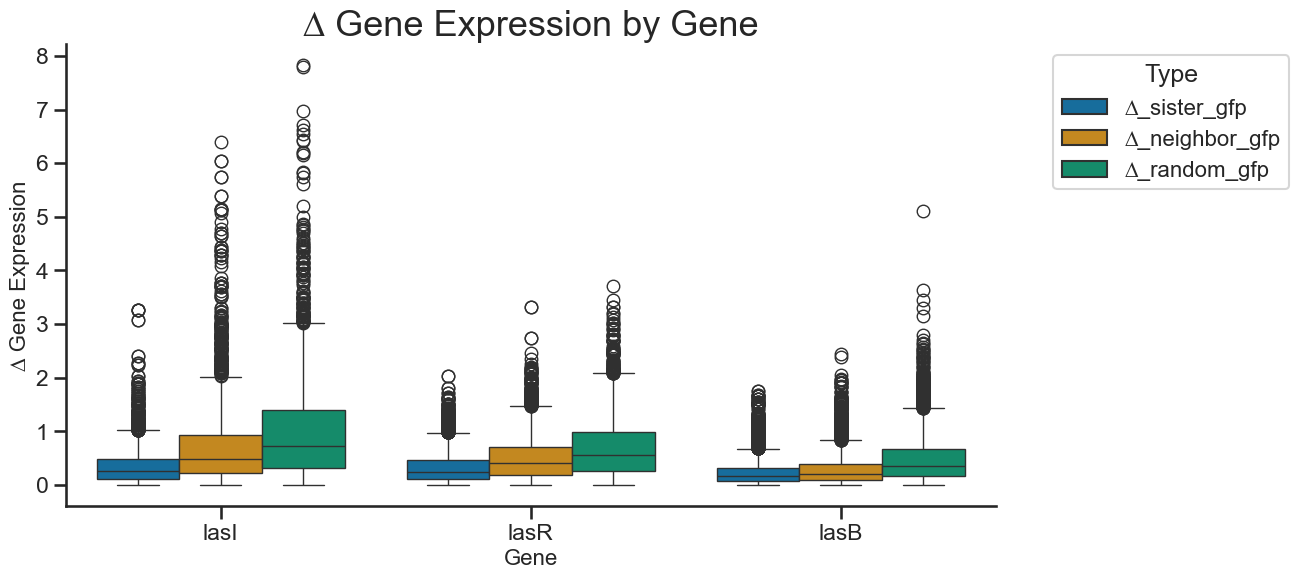

{'lasI': {'ttest_sister_neighbor': TtestResult(statistic=np.float64(-23.06071620619029), pvalue=np.float64(1.0401222021301813e-112), df=np.float64(5866.0)),
  'ttest_sister_random': TtestResult(statistic=np.float64(-34.46501842952273), pvalue=np.float64(3.3085093107221296e-237), df=np.float64(5866.0)),
  'ttest_neighbor_random': TtestResult(statistic=np.float64(-12.736329952259938), pvalue=np.float64(1.1325502170886321e-36), df=np.float64(5866.0)),
  'anova': F_onewayResult(statistic=np.float64(570.8247334757352), pvalue=np.float64(8.093676423354535e-234))},
 'lasR': {'ttest_sister_neighbor': TtestResult(statistic=np.float64(-19.71264935761481), pvalue=np.float64(3.496879683731311e-84), df=np.float64(6850.0)),
  'ttest_sister_random': TtestResult(statistic=np.float64(-32.99428319227467), pvalue=np.float64(1.066938010812534e-221), df=np.float64(6850.0)),
  'ttest_neighbor_random': TtestResult(statistic=np.float64(-15.523448661954966), pvalue=np.float64(1.9429375345916144e-53), df=np.flo

In [16]:
# Melt the dataframe to long format for seaborn boxplot
melted_df = df_3.melt(id_vars=['gene'], value_vars=['∆_sister_gfp', '∆_neighbor_gfp', '∆_random_gfp'], 
                    var_name='delta_type', value_name='delta_value')

# set x-axis gene order
gene_order = ['lasI', 'lasR', 'lasB']
melted_df['gene'] = pd.Categorical(melted_df['gene'], categories=gene_order, ordered=True)

# Draw the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='gene', y='delta_value', hue='delta_type', data=melted_df)
plt.title('∆ Gene Expression by Gene', fontsize=26)
plt.xlabel('Gene', fontsize=16)
plt.ylabel('∆ Gene Expression', fontsize=16)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
sns.despine(top=True, right=True)
plt.show()

# Calculate statistical significance
# genes = ['lasI', 'lasR', 'lasB']
results = {}

for gene in gene_order:
    subset = df_2[df_2['gene'] == gene]
    delta_sister = subset['∆_sister_gfp'].dropna()
    delta_neighbor = subset['∆_neighbor_gfp'].dropna()
    delta_random = subset['∆_random_gfp'].dropna()
    
    # Pairwise t-tests
    ttest_sister_neighbor = stats.ttest_ind(delta_sister, delta_neighbor)
    ttest_sister_random = stats.ttest_ind(delta_sister, delta_random)
    ttest_neighbor_random = stats.ttest_ind(delta_neighbor, delta_random)
    
    # ANOVA
    anova = stats.f_oneway(delta_sister, delta_neighbor, delta_random)
    
    results[gene] = {
        'ttest_sister_neighbor': ttest_sister_neighbor,
        'ttest_sister_random': ttest_sister_random,
        'ttest_neighbor_random': ttest_neighbor_random,
        'anova': anova
    }

results

In [14]:
# # Group by 'gene' and 'cluster' and calculate the mean values
# df_4 = df_2.groupby(['gene', 'cluster'])[['∆_sister_gfp', '∆_neighbor_gfp', '∆_random_gfp']].mean().reset_index()
df_4 = df_2.groupby(['gene', 'cluster']).agg(
    {'∆_sister_gfp': 'mean', 
     '∆_neighbor_gfp': 'mean', 
     '∆_random_gfp': 'mean',
     'Autoinducer': 'first'}
).reset_index()

In [15]:
df_5 = df_4[df_4['gene'] != 'rpsL']

In [16]:
for gene, data in gene_data.items():
    print(f"Gene: {gene}")
    print(data)

Gene: ('lasI', '∆_sister_gfp')
38539    0.094536
38540    0.246599
38541    0.006305
38542    0.716475
38543    0.103090
           ...   
41539    0.027182
41540    0.377525
41541    0.255703
41542    0.255328
41543    0.785794
Name: ∆_sister_gfp, Length: 2934, dtype: float64
Gene: ('lasI', '∆_neighbor_gfp')
38539    2.160166
38540    0.192885
38541    0.224512
38542    0.592684
38543    0.284069
           ...   
41539    1.299411
41540    0.712373
41541    2.140733
41542    1.510280
41543    0.680887
Name: ∆_neighbor_gfp, Length: 2934, dtype: float64
Gene: ('lasI', '∆_random_gfp')
38539    1.465407
38540    0.634795
38541    0.199822
38542    0.174048
38543    0.121571
           ...   
41539    0.099510
41540    1.327442
41541    2.648662
41542    0.460926
41543    0.102130
Name: ∆_random_gfp, Length: 2934, dtype: float64
Gene: ('lasR', '∆_sister_gfp')
41544    0.419796
41546    0.478208
41547    0.427766
41548    0.657505
41549    0.148820
           ...   
45128    0.260421
45129

In [17]:
non_normal_genes

['lasI', 'lasI', 'lasI', 'lasR', 'lasR', 'lasR', 'lasB', 'lasB', 'lasB']

/var/folders/z2/q1qv_y2d5wq14w63qr1l_2rh0000gn/T/ipykernel_45794/3137127713.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = melted_df.groupby('gene')['delta_value'].count() / 3
/var/folders/z2/q1qv_y2d5wq14w63qr1l_2rh0000gn/T/ipykernel_45794/3137127713.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=16)


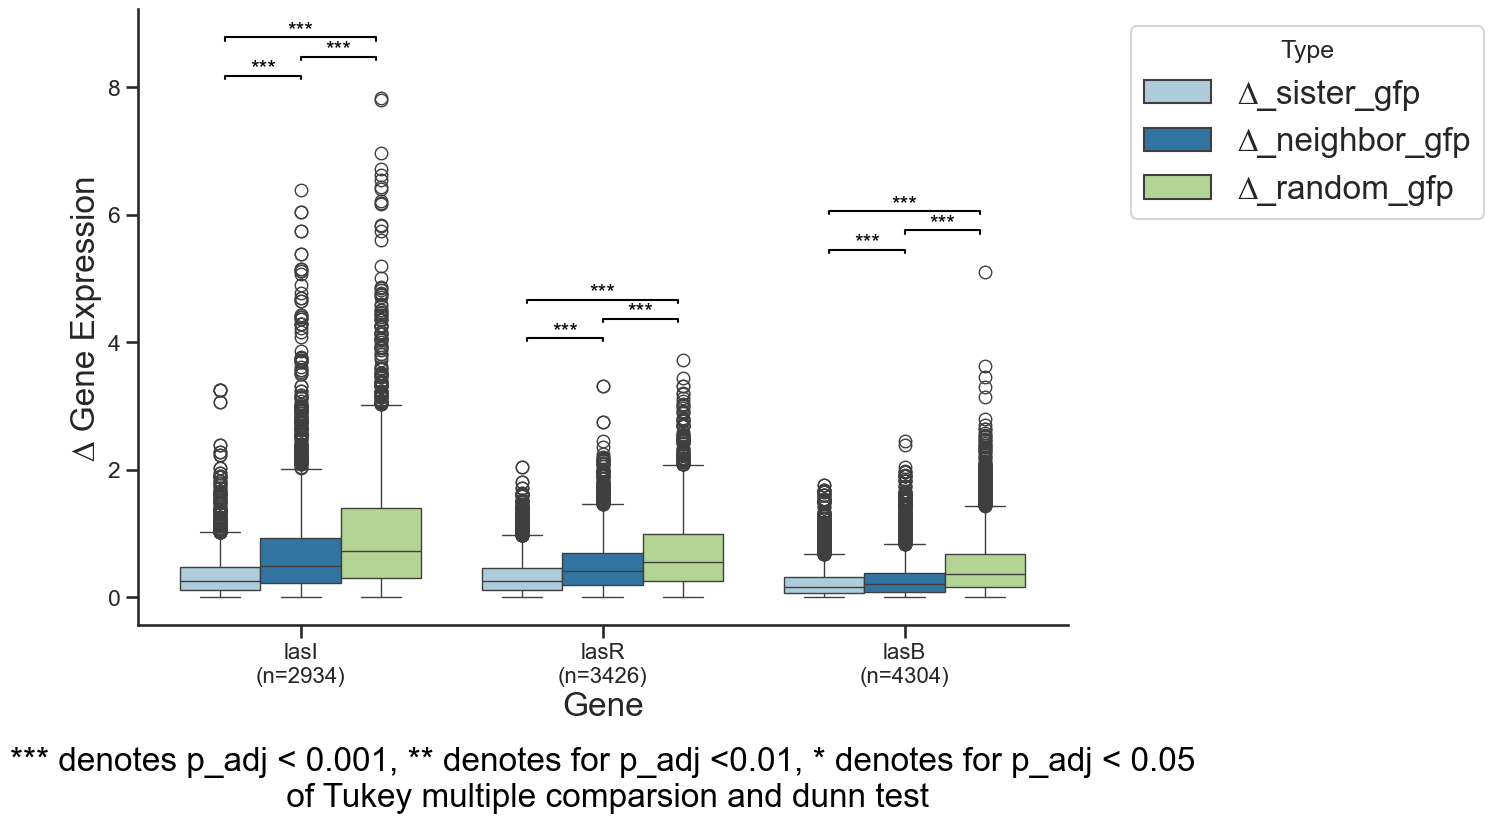

In [13]:
from scipy.stats import shapiro, kruskal, f_oneway
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

# Melt the dataframe to long format for seaborn boxplot
melted_df = df_3.melt(id_vars=['gene'], value_vars=['∆_sister_gfp', '∆_neighbor_gfp', '∆_random_gfp'], 
                    var_name='delta_type', value_name='delta_value')

# set x-axis gene order
gene_order = ['lasI', 'lasR', 'lasB']
value_vars=['∆_sister_gfp', '∆_neighbor_gfp', '∆_random_gfp']
melted_df['gene'] = pd.Categorical(melted_df['gene'], categories=gene_order, ordered=True)

# Draw the box plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='gene', y='delta_value', hue='delta_type', data=melted_df)

# set xticklabels
cluster_counts = melted_df.groupby('gene')['delta_value'].count() / 3
x_labels = [f"{gene}\n(n={int(count)})" for gene, count in cluster_counts.items()]
ax.set_xticklabels(x_labels, fontsize=16)


# plt.title('Colony mean ∆ Gene Expression (las)', fontsize=26)
plt.xlabel('Gene', fontsize=24)
plt.ylabel('∆ Gene Expression', fontsize=24)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=24)
sns.despine(top=True, right=True)
plt.text(0.5, -0.25, '*** denotes p_adj < 0.001, ** denotes for p_adj <0.01, * denotes for p_adj < 0.05\n of Tukey multiple comparsion and dunn test', ha='center', va='center', transform=ax.transAxes, fontsize=24, color='black')


# normality test
non_normal_genes = []
gene_data = {(gene, var): df_3.loc[df_3['gene'] == gene, var].dropna() 
             for gene in gene_order
             for var in value_vars}


for gene, data in gene_data.items():
    stat, p = shapiro(data)  # Shapiro-Wilk test for normality
    if p < 0.05:  # 不符合正态分布
        non_normal_genes.append(gene[0])
    # print(f"Gene: {gene}, Shapiro-Wilk Test Stat: {stat:.4f}, p-value: {p:.4f}")

# Calculate statistical significance
stat_results = {}

for gene in gene_order:
    subset = df_3[df_3['gene'] == gene]
    delta_sister = subset['∆_sister_gfp'].dropna()
    delta_neighbor = subset['∆_neighbor_gfp'].dropna()
    delta_random = subset['∆_random_gfp'].dropna()
    
    if gene in non_normal_genes:
        # Kruskal-Wallis H-test
        kruskal = stats.kruskal(delta_sister, delta_neighbor, delta_random)
        stat_results[gene] = {
            'kruskal': kruskal
        }
        
        # Tukey HSD post hoc test
        import statsmodels.api as sm
        from statsmodels.stats.multicomp import pairwise_tukeyhsd

        # 数据与分组
        data = list(delta_sister) + list(delta_neighbor) + list(delta_random)
        groups = ['group1'] * len(delta_sister) + ['group2'] * len(delta_neighbor) + ['group3'] * len(delta_random)

        # Tukey HSD 检验
        tukey = pairwise_tukeyhsd(endog=data, groups=groups, alpha=0.05)
        # print(tukey)
        
        # Add significance labels
        for i, (group1, group2) in enumerate([('group1', 'group2'),  ('group2', 'group3'), ('group1', 'group3')]):
            p_adj = tukey.pvalues[i]
            if p_adj < 0.001:
                label = '***'
            elif p_adj < 0.01:
                label = '**'
            elif p_adj < 0.05:
                label = '*'
            else:
                label = 'ns'
            
            if label != 'ns':
                # Determine the position for the stars
                x_list = [(gene_order.index(gene)-0.25, gene_order.index(gene)), (gene_order.index(gene), gene_order.index(gene) + 0.25), (gene_order.index(gene)-0.25, gene_order.index(gene) + 0.25)]
                x1, x2 = x_list[i]
                y_max = max(melted_df[melted_df['gene'] == gene]['delta_value'])
                y = y_max + 0.3 * (i + 1)
                # x1, x2 = gene_order.index(gene)-0.25, gene_order.index(gene)+0.25*i
                plt.plot([x1, x1, x2, x2], [y, y + 0.05, y + 0.05, y], lw=1.5, c='k')
                plt.text((x1 + x2) * .5, y, label, ha='center', va='bottom', color='k', fontsize=16)
            
    else:
        # anova
        anova = stats.f_oneway(delta_sister, delta_neighbor, delta_random)
        stat_results[gene] = {
            'anova': anova
        }

        # Dunn 检验
        data = [delta_sister, delta_neighbor, delta_random]
        dunn = sp.posthoc_dunn(data, p_adjust='bonferroni')
        # print(dunn)
        
        for i, ind in enumerate([[0,1],[0,2],[1,2]]):
            p_adj = dunn.iloc[ind[0], ind[1]]
            if p_adj < 0.001:
                label = '***'
            elif p_adj < 0.01:
                label = '**'
            elif p_adj < 0.05:
                label = '*'
            else:
                label = 'ns'
            
            if label != 'ns':
                # Determine the position for the stars
                y_max = max(melted_df[melted_df['gene'] == gene]['delta_value'])
                y = y_max + 0.3 * (i + 1)
                if i == 2:
                    x1, x2 = gene_order.index(gene), gene_order.index(gene) + 0.25 * (i - 1)
                    y = y_max + 0.3 * (i - 1)
                else:
                    x1, x2 = gene_order.index(gene) - 0.25, gene_order.index(gene) + 0.25 * i
                plt.plot([x1, x1, x2, x2], [y, y + 0.05, y + 0.05, y], lw=1.5, c='k')
                plt.text((x1 + x2) * .5, y, label, ha='center', va='bottom', color='k', fontsize=16)
        
# print(stat_results)
plt.show()

In [86]:
stat_results

{'lasI': {'anova': F_onewayResult(statistic=np.float64(14.107144409394087), pvalue=np.float64(6.393163337246439e-05))},
 'lasR': {'anova': F_onewayResult(statistic=np.float64(48.63331837633549), pvalue=np.float64(3.855674044958196e-10))},
 'lasB': {'anova': F_onewayResult(statistic=np.float64(37.81162365408275), pvalue=np.float64(3.821259878469832e-08))}}

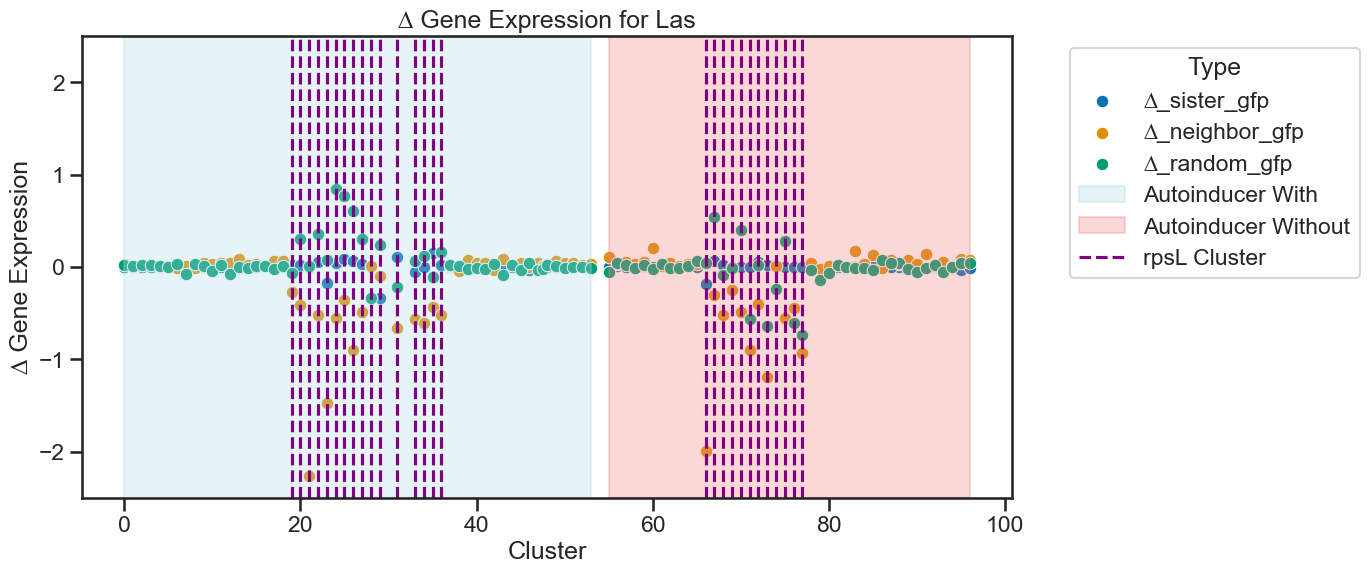

In [19]:
plt.figure(figsize=(12, 6))

# Scatter plots for different gene expression differences
sns.scatterplot(x='cluster', y='∆_sister_gfp', data=df_4, label='∆_sister_gfp')
sns.scatterplot(x='cluster', y='∆_neighbor_gfp', data=df_4, label='∆_neighbor_gfp')
sns.scatterplot(x='cluster', y='∆_random_gfp', data=df_4, label='∆_random_gfp')

# Add shaded areas for Autoinducer status
# Assuming you have two cluster ranges for Autoinducer "With" and "Without"
with_clusters = df_4[df_4['Autoinducer'] == 'With']['cluster'].unique()
without_clusters = df_4[df_4['Autoinducer'] == 'Without']['cluster'].unique()

plt.axvspan(min(with_clusters), max(with_clusters), color='lightblue', alpha=0.3, label='Autoinducer With')
plt.axvspan(min(without_clusters), max(without_clusters), color='lightcoral', alpha=0.3, label='Autoinducer Without')

# Highlight clusters with gene 'rpsL'
rpsL_clusters = df_4[df_4['gene'] == 'rpsL']['cluster'].unique()
for cluster in rpsL_clusters:
    plt.axvline(x=cluster, color='purple', linestyle='--', label='rpsL Cluster' if cluster == rpsL_clusters[0] else "")

# Titles and labels
plt.ylim(-2.5, 2.5)
plt.title('∆ Gene Expression for Las')
plt.xlabel('Cluster')
plt.ylabel('∆ Gene Expression')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

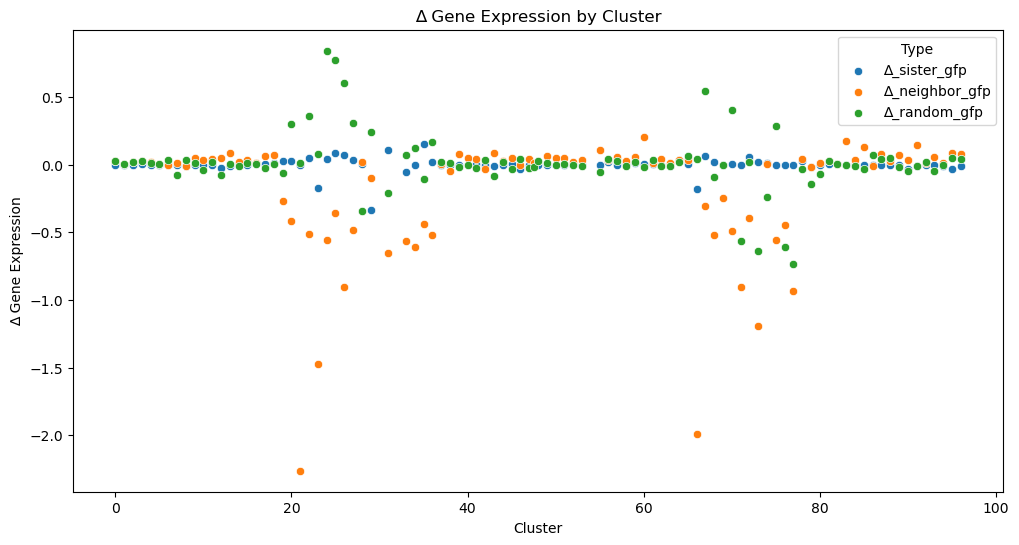

In [ ]:
# # Melt the dataframe to long format for seaborn boxplot
# melted_df = df_2.melt(id_vars=['gene'], value_vars=['∆_sister_gfp', '∆_neighbor_gfp', '∆_random_gfp'], 
#                     var_name='delta_type', value_name='delta_value')

# # Draw the box plot
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='gene', y='delta_value', hue='delta_type', data=melted_df)
# plt.title('∆ Gene Expression by Gene')
# plt.xlabel('Gene')
# plt.ylabel('∆ Gene Expression')
# plt.legend(title='Type')
# plt.show()
# Plot scatter for each cluster in df_2
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cluster', y='∆_sister_gfp', data=df_3, label='∆_sister_gfp')
sns.scatterplot(x='cluster', y='∆_neighbor_gfp', data=df_3, label='∆_neighbor_gfp')
sns.scatterplot(x='cluster', y='∆_random_gfp', data=df_3, label='∆_random_gfp')
plt.title('∆ Gene Expression by Cluster')
plt.xlabel('Cluster')
plt.ylabel('∆ Gene Expression')
plt.legend(title='Type')
plt.show()


## calculate cluster level gene expression difference

In [51]:
df_3.groupby('gene')['cluster'].nunique()

gene
lasB    20
lasI    17
lasR    30
rpsL    28
Name: cluster, dtype: int64

In [67]:
df_3.loc[df_3.gene == 'lasB'].cluster.value_counts()

cluster
44.0    1
45.0    1
95.0    1
94.0    1
93.0    1
92.0    1
91.0    1
90.0    1
89.0    1
88.0    1
53.0    1
52.0    1
51.0    1
50.0    1
49.0    1
48.0    1
47.5    1
47.0    1
46.0    1
96.0    1
Name: count, dtype: int64

In [78]:
df_2.loc[(df_2.Autoinducer == 'Without' )& (df_2.gene == 'rpsL')].cluster.value_counts()

cluster
69.0    2239
70.0    1746
72.0    1694
68.0    1078
67.0     992
73.0     688
75.0     352
77.0     246
74.0     245
66.0     238
71.0     200
76.0     128
Name: count, dtype: int64